# WallPY for Master Students

As a student at NTNU's MTNANO, you will encounter AFM at least twice. This will be using two AFMs from two companies.
So far, there has been no quick fixes to handle the postprocessing without Brute-forcing Gwyddion. 
However, starting from 2024, students in Nanotools and TMT4515 are advised to use WallPY's universal reader for data retrieval. 



### 1. Install and Open Gwyddion. 
### 2. Open the AFM file you want to analyse. 
### 3. Save as: Notice that .gwy file format is default, and change the extension in the filename dialog to .gwy
### 4. Make sure you have converted all your raw data to .gwy format. Close Gwyddion, and uninstall it.
### 5. Fork the WallPY repository from GitHub, install the environment/requirements of your choice. 
### 6. Unleash WallPY 

### Do your imports

The path to the forked folder should be inserted in the wallpy_cmd variable. 
If you know of a better way to do this, please HMU


In [16]:
import os
import sys


wallpy_cmd = r"C:\Users\rubensd\OneDrive - NTNU\PhD\Analysis\WallPY"

sys.path.append(os.path.join(wallpy_cmd, "IO"))
sys.path.append(os.path.join(wallpy_cmd, "Display"))
sys.path.append(os.path.join(wallpy_cmd, "Functionality"))


from universal_reader import GwyFile
from figures import FigureSinglePlot, FigureSubplots
import transformations as trans
import attributes as attr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


%reload_ext autoreload
%autoreload 2

### Then you need path to your data if it is not in your forked wallpy folder.
### Initialize the GwyFile

In [17]:
path = "" # Allowed when in same folder
name = "sample-18.0_00012" # Extension not needed in name

obj = GwyFile(path, name)

H5 Structure exists.
Channels found: 
ZSensor_None_0
Voltage_None_1


### You will be told if you need to convert the gwy-file to h5 format, or if the file already exists. 
### Convert it using the __call__() method.

In [18]:
obj() # Reads the file and stores the data in associated h5 format. Notice what channels are available

Channels found: 
ZSensor not found in keywords dictionary.
ZSensor_None_0
Peak Force Error not found in keywords dictionary.
Voltage_None_1


### Sometimes a file contains many channels. Get an overview by creating an overview-png.

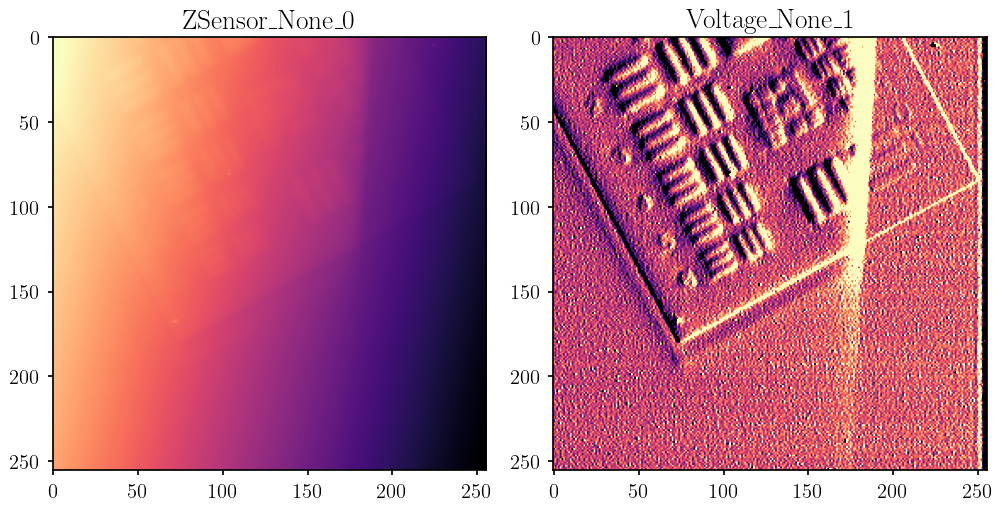

In [19]:
obj.create_overview_file(quantile=0.1)

### Check the source code to learn how to retrieve the data you want

#### There are many options. You can retrieve by full channel name, original index, or by the index in the list of channels
#### In addition, you need to access the metadata, for instance "xres"

Here, we use these features to quickly plot the deflection.

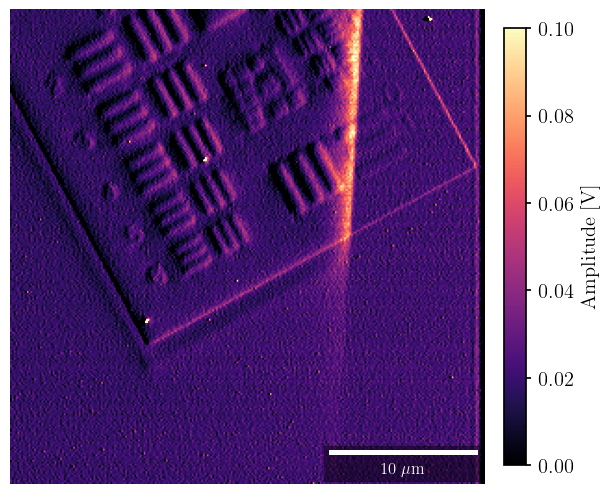

In [20]:
# Both retrieve the same data
amp = obj[1]
amp = obj.get_nth(-1)


ex_figure = FigureSubplots(
    obj, show=True, filename="amp_quick", nrows=1, ncols=1, figsize=(6, 6)
)

ax = ex_figure.create_subplot()

img = ax.ax.imshow(amp, cmap="magma", vmin=0, vmax=0.1)
ax.ax.axis("off")
attr.add_scalebar(ax.ax, obj.index_metadata(1, "xres") )
attr.add_colorbar(ax.ax, img , label = "Amplitude [V]")
ex_figure()

### The height data, on the other hand, tends to require the use of a leveling function.

Also note that one can display the data directly with matplotlib without using the WallPY overhead.


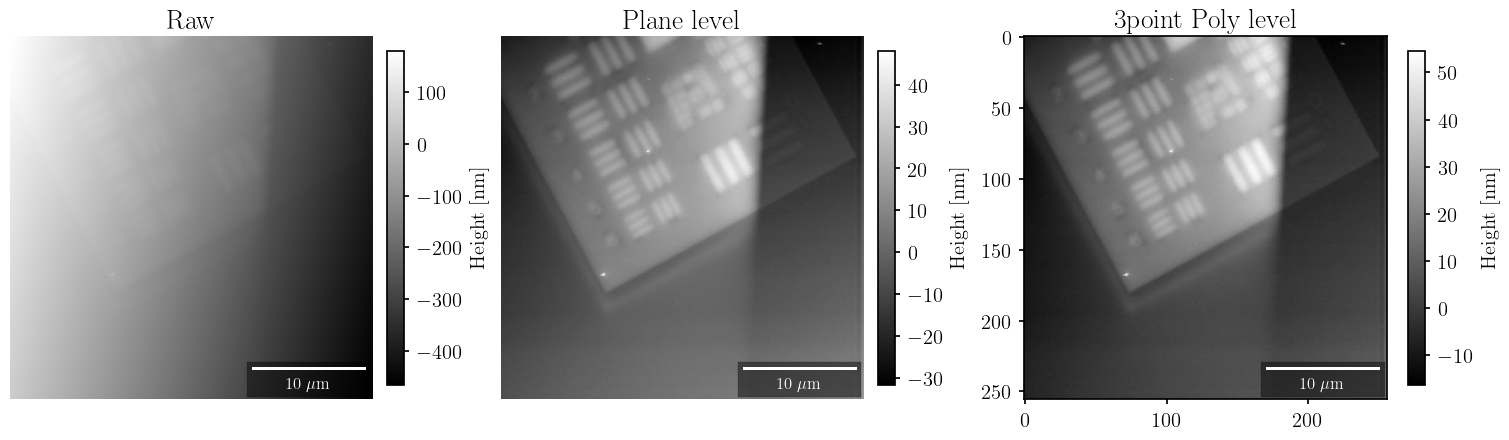

In [75]:
height = obj[0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
img = ax[0].imshow(height*1e9, cmap="gray")
ax[0].axis("off")
attr.add_scalebar(ax[0], obj.index_metadata(0, "xres") )
attr.add_colorbar(ax[0], img , label = "Height [nm]")
ax[0].set_title("Raw")

level_plane = height - trans.plane_level(height)[0]
img = ax[1].imshow(level_plane*1e9, cmap="gray")
ax[1].axis("off")
attr.add_scalebar(ax[1], obj.index_metadata(0, "xres") )
attr.add_colorbar(ax[1], img , label = "Height [nm]")
ax[1].set_title("Plane level")


poly_level = height[:,:] - trans.poly2D_least_squares(height[:,:], order=2)
img = ax[2].imshow(poly_level*1e9, cmap="gray")
ax[2].axis("off")
attr.add_scalebar(ax[2], obj.index_metadata(0, "xres") )
attr.add_colorbar(ax[2], img , label = "Height [nm]")
ax[2].set_title("2th Poly level")
plt.show()

